<a href="https://colab.research.google.com/github/2017710206255MN/Machine-Learning/blob/main/Week_5_Homework_2_%26_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data = pd.read_csv('/content/drive/MyDrive/Data/advertising.csv')

In [68]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [69]:
data.describe

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgen

In [70]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [71]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])
data['Timestamp'] = (data['Timestamp'] - data['Timestamp'].min())
data.dtypes

Daily Time Spent on Site            float64
Age                                   int64
Area Income                         float64
Daily Internet Usage                float64
Ad Topic Line                        object
City                                 object
Male                                  int64
Country                              object
Timestamp                   timedelta64[ns]
Clicked on Ad                         int64
dtype: object

In [72]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [73]:
data = pd.get_dummies(data, columns=['City'],dtype=float)
data = pd.get_dummies(data, columns=['Country'],dtype=float)

In [74]:
X=data.drop(columns=['Clicked on Ad','Ad Topic Line','Timestamp'])
y=data['Clicked on Ad']
X.dtypes

Daily Time Spent on Site     float64
Age                            int64
Area Income                  float64
Daily Internet Usage         float64
Male                           int64
                              ...   
Country_Wallis and Futuna    float64
Country_Western Sahara       float64
Country_Yemen                float64
Country_Zambia               float64
Country_Zimbabwe             float64
Length: 1211, dtype: object

In [75]:
best=SelectKBest(score_func=chi2, k=100)
fit1=best.fit(X,y)
data_scores=pd.DataFrame(fit1.scores_)
data_columns=pd.DataFrame(X.columns)
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(10,'Score'))

                       Feature          Score
2                  Area Income  741376.597205
3         Daily Internet Usage    6617.726024
0     Daily Time Spent on Site    2161.951402
1                          Age     519.470827
1039          Country_Ethiopia       7.000000
999            Country_Bolivia       6.000000
1025           Country_Croatia       6.000000
1048             Country_Gabon       6.000000
1094     Country_Liechtenstein       6.000000
1010          Country_Cameroon       5.000000


In [76]:
X=X[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=1)

In [78]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))

confusion matrix
[[180   6]
 [ 16 168]]


Accuracy of k-NN Classification: 94.05405405405406 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       186
           1       0.97      0.91      0.94       184

    accuracy                           0.94       370
   macro avg       0.94      0.94      0.94       370
weighted avg       0.94      0.94      0.94       370



In [80]:
error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

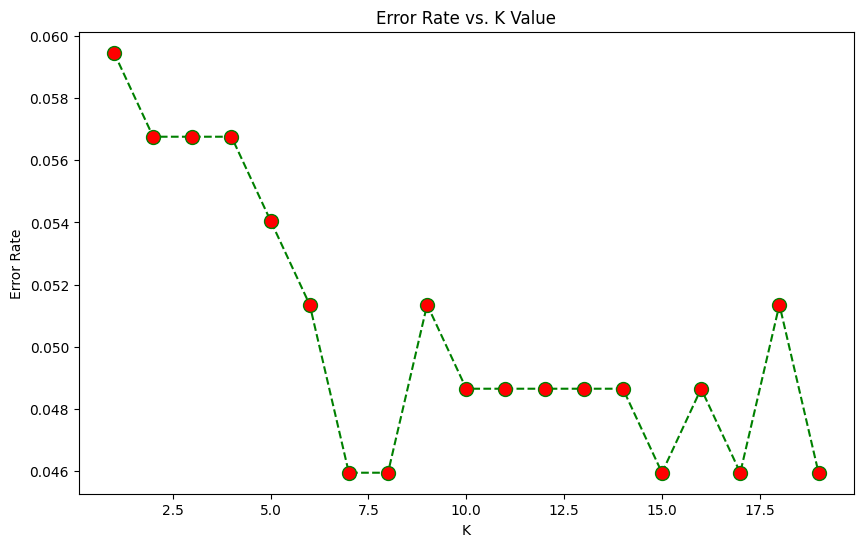

In [81]:
plt.figure(figsize=(10,6))

plt.plot(range(1,20),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [82]:
knn = KNeighborsClassifier(n_neighbors=7)
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))

confusion matrix
[[185   1]
 [ 16 168]]


Accuracy of k-NN Classification: 95.4054054054054 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       186
           1       0.99      0.91      0.95       184

    accuracy                           0.95       370
   macro avg       0.96      0.95      0.95       370
weighted avg       0.96      0.95      0.95       370

